In [34]:
#import dependencies 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [35]:
#Load dataset
data = load_iris()
dir(data)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [36]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Visualize using matplotlib

In [37]:
df = pd.DataFrame(data.data,columns=data.feature_names)
df['target'] = data.target
df


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [39]:
df.drop('target' ,axis=1, inplace=True)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [40]:
X = df
y = data.target 
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2)

In [41]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [42]:
prediction = model.predict(X_test)
print("Prediction: ", prediction)

Prediction:  [2 0 1 2 2 2 1 0 0 0 1 1 2 2 2 1 1 2 0 2 1 0 1 0 2 1 1 2 0 2]


In [45]:
model.score(X_test , y_test)

0.9333333333333333

In [46]:
import seaborn as sns

In [48]:
cm = confusion_matrix(y_test,prediction)
cm

array([[ 8,  0,  0],
       [ 0, 10,  2],
       [ 0,  0, 10]], dtype=int64)

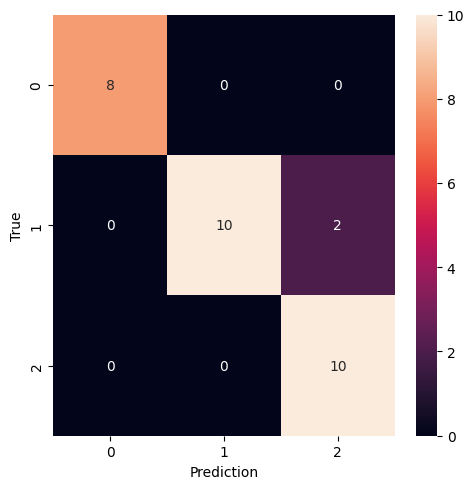

In [52]:

plt.figure(figsize=(5,5))
sns.heatmap(cm,annot=True)
plt.xlabel('Prediction')
plt.ylabel('True')
plt.tight_layout()
plt.show()